In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import random
from PIL import Image

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D
import cv2


# Image Visualization

In [2]:
test_loc='bone_fracture/test/'
train_loc='bone_fracture/train/'
val_loc='bone_fracture/valid/'

image_size=(96,96)
batch_size=10

train_dataset=image_dataset_from_directory(train_loc,
                                           batch_size=batch_size,
                                           image_size=image_size,
                                           validation_split=0.2,
                                           subset="training",
                                           shuffle=True,
                                           seed=42)

val_dataset=image_dataset_from_directory(val_loc,
                                           batch_size=batch_size,
                                           image_size=image_size,
                                           validation_split=0.2,
                                           subset="validation",
                                           shuffle=True,
                                           seed=42)

test_dataset=image_dataset_from_directory(test_loc,
                                           batch_size=batch_size,
                                           image_size=image_size,
                                           shuffle=True,
                                           seed=42)

Found 3631 files belonging to 2 classes.
Using 2905 files for training.
Found 348 files belonging to 2 classes.
Using 69 files for validation.
Found 169 files belonging to 2 classes.


In [3]:
train_dataset.class_names

['images', 'labels']

In [5]:
for images,labels in train_dataset.take(1):
    
    random_idx=random.randint(0,batch_size-1)
    
    random_image=images[random_idx]
    random_label=labels[random_idx]
    
    example_image = random_image.numpy().astype("uint8")

    print(example_image)

[[[79 79 79]
  [68 68 68]
  [57 57 57]
  ...
  [72 72 72]
  [72 72 72]
  [72 72 72]]

 [[81 81 81]
  [60 60 60]
  [48 48 48]
  ...
  [49 49 49]
  [48 48 48]
  [55 55 55]]

 [[84 84 84]
  [58 58 58]
  [44 44 44]
  ...
  [37 37 37]
  [37 37 37]
  [46 46 46]]

 ...

 [[38 38 38]
  [37 37 37]
  [37 37 37]
  ...
  [72 72 72]
  [82 82 82]
  [86 86 86]]

 [[38 38 38]
  [37 37 37]
  [36 36 36]
  ...
  [72 72 72]
  [83 83 83]
  [86 86 86]]

 [[48 48 48]
  [47 47 47]
  [46 46 46]
  ...
  [72 72 72]
  [83 83 83]
  [86 86 86]]]


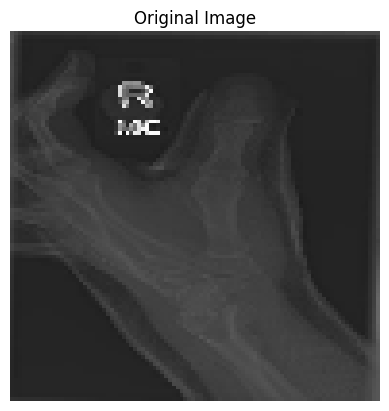

In [6]:
# Function to display images
def display_image(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

display_image(example_image, 'Original Image')


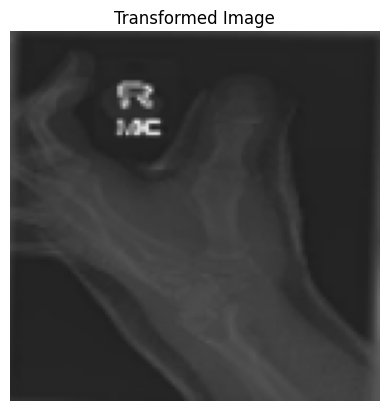

In [7]:
# 2. Data Transformation: Resize the image
transformed_image = cv2.resize(example_image, (128, 128))
display_image(transformed_image, 'Transformed Image')

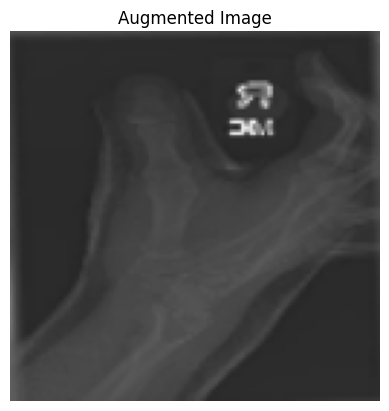

In [9]:
# 3. Data Augmentation: Apply a random transformation
augmented_image = tf.image.random_flip_left_right(np.array(transformed_image))
augmented_image = tf.image.random_brightness(augmented_image, max_delta=0.1)
display_image(augmented_image, 'Augmented Image')

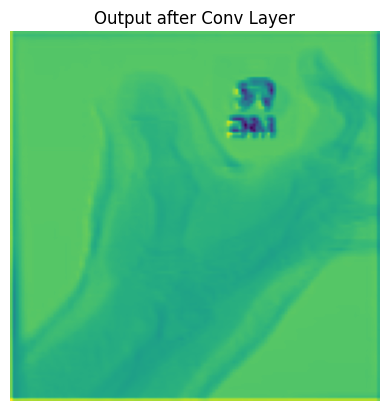

In [10]:
# 4. Convolutional Layer Processing
# Prepare the image for the model by converting to a tensor
model_image = np.array(augmented_image)[np.newaxis, ...] / 255.0

# Create a simple convolutional layer and apply it to the image
conv_layer = Conv2D(filters=1, kernel_size=(3, 3), strides=(1, 1), padding = 'same')
output = conv_layer(model_image)

output_image = np.squeeze(output.numpy())
display_image(output_image, 'Output after Conv Layer')